In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [48]:
EN = pd.read_csv("C:\\AI(ml&dl)\\jupiter(machine learning)\\Projetcs(ML)\\Energy Meter\\Energy Meter.csv")
EN.head()

,0.0,0.0.1,0.0.2,NoLoad
0,0.0,0.0,0.0,NoLoad
1,0.0,0.0,0.0,NoLoad
2,0.0,0.0,0.0,NoLoad
3,0.0,0.0,0.0,NoLoad
4,0.0,0.0,0.0,NoLoad


In [49]:
EN.shape

(399, 4)

In [50]:
EN.describe()

,0.0,0.0.1,0.0.2
count,399.000000,399.000000,399.000000
mean,161.059970,0.318530,68.235642
std,92.893173,0.320436,68.943659
min,0.000000,0.000000,0.000000
25%,157.536300,0.126360,11.075503
50%,213.114800,0.176985,38.464345
75%,215.031300,0.545214,126.949290
max,304.340200,1.227349,264.859337


In [51]:
EN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0     399 non-null    float64
 1   0.0.1   399 non-null    float64
 2   0.0.2   399 non-null    float64
 3   NoLoad  399 non-null    object 
dtypes: float64(3), object(1)
memory usage: 12.6+ KB


In [52]:
EN.isna().sum()

0.0       0
0.0.1     0
0.0.2     0
NoLoad    0
dtype: int64

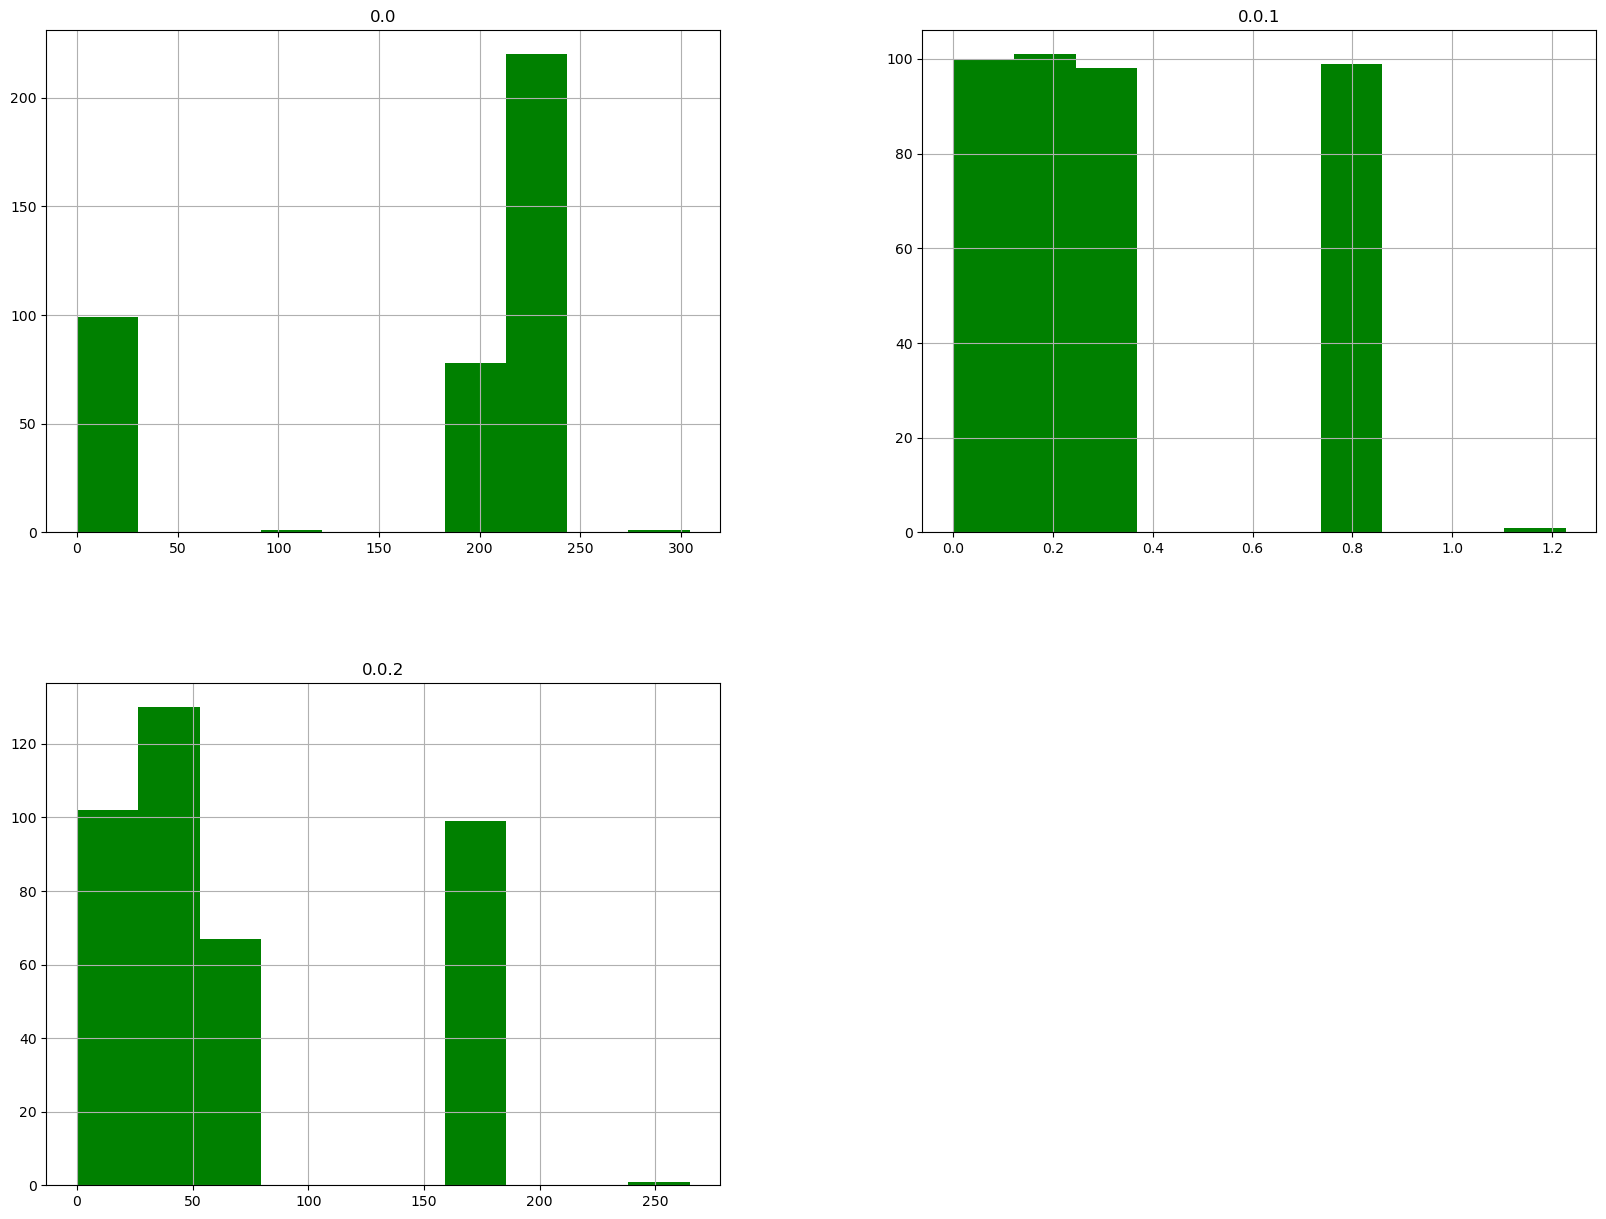

In [53]:
EN.hist(figsize = (20,15),color = 'green')
plt.show()

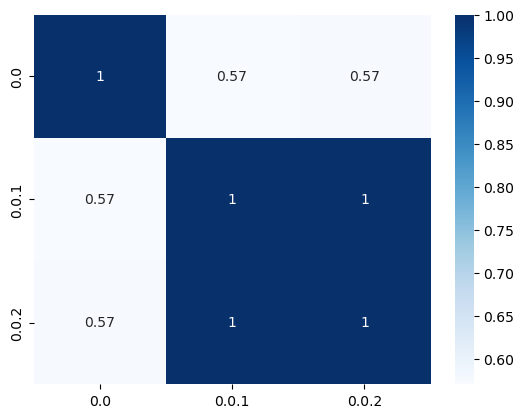

In [54]:
sns.heatmap(EN.corr(),annot = True,cmap = 'Blues')
plt.show()

In [55]:
EN.NoLoad.unique()

array(['NoLoad', 'Normal', 'Medium', 'Risk'], dtype=object)

In [62]:
EN['NoLoad'] = EN['NoLoad'].replace({'NoLoad': 0,'Normal':1,'Medium':2,'Risk':3 })
EN

,0.0,0.0.1,0.0.2,NoLoad
0,0.0000,0.000000,0.000000,0
1,0.0000,0.000000,0.000000,0
2,0.0000,0.000000,0.000000,0
3,0.0000,0.000000,0.000000,0
4,0.0000,0.000000,0.000000,0
...,...,...,...,...
394,214.2647,0.847530,181.595761,3
395,214.6480,0.850669,182.594400,3
396,215.0313,0.850669,182.920461,3
397,211.9649,0.850669,180.311970,3


In [57]:
x = EN.iloc[:,:-1].values
y = EN.iloc[:,-1].values

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
print(x_train.shape,y_train.shape)


(319, 3) (319,)


In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)

C:\Users\HAI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred)*100)

0.0
100.0


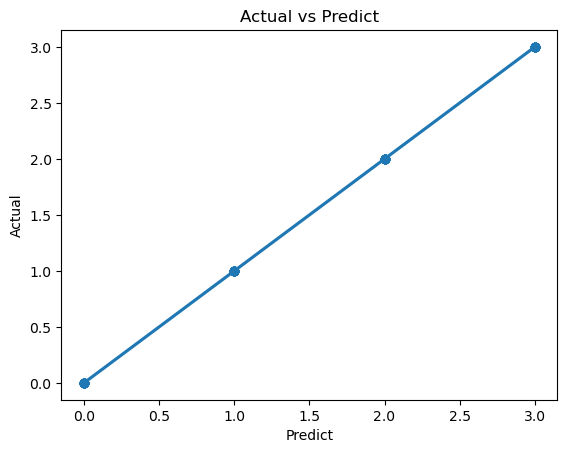

In [64]:
sns.regplot(y = y_test, x = pred)
plt.title('Actual vs Predict')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()